# Missile Guidance Simulation
2D/3D Biased Proportional Navigation Guidance Law is implemented.

In 2D, lateral acceleration command is given as follows:

$\displaystyle a_{cmd} = NV\dot{\lambda} - \frac{K_{r}\left(r\right)K_{\eta}\left(\eta\right)}{r}e_{\gamma_{f}}$

In [1]:
include("main_missiles.jl")

main (generic function with 1 method)

In [2]:
include("sim_missiles.jl")

# To avoid redefinition of a named (or an anonymous) function at each time tuning parameters and running simulation,
# place the custom definition of a bias command function in a different cell from the cell containing sim_plot.

custom_bias(s,x,t) = zeros(3)
# option 2: function custom_bias(s,x,t)  return zeros(3) end
# option 3: custom_bias = (s,x,t) -> zeros(3)

custom_bias (generic function with 1 method)

┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/nhcho/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331


 86.395654 seconds (633.73 M allocations: 35.222 GiB, 10.31% gc time, 0.02% compilation time)


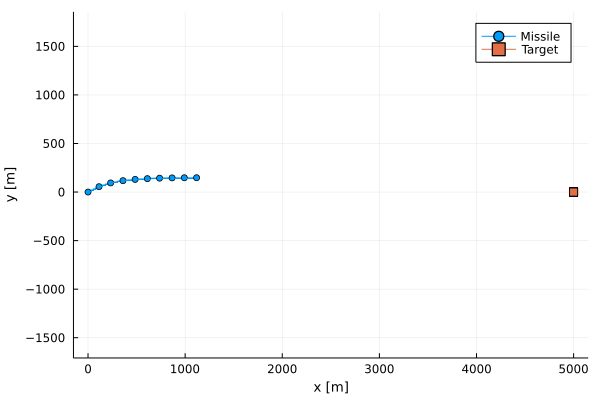

,time,sol
,Float64,NamedTu…
1,0.0,"(pursuer = (p = [0.0, 0.0, 0.0], v = [259.808, 150.0, 0.0]), evador = (p = [5000.0, 0.0, 0.0], v = [0.0, 0.0, 0.0]), r = 5000.0)"
2,0.01,"(pursuer = (p = [2.60057, 1.49567, 0.0], v = [260.306, 149.133, 0.0]), evador = (p = [5000.0, 0.0, 0.0], v = [0.0, 0.0, 0.0]), r = 4997.4)"
3,0.02,"(pursuer = (p = [5.20611, 2.98266, 0.0], v = [260.802, 148.265, 0.0]), evador = (p = [5000.0, 0.0, 0.0], v = [0.0, 0.0, 0.0]), r = 4994.79)"
4,0.03,"(pursuer = (p = [7.8166, 4.46095, 0.0], v = [261.295, 147.394, 0.0]), evador = (p = [5000.0, 0.0, 0.0], v = [0.0, 0.0, 0.0]), r = 4992.19)"
5,0.04,"(pursuer = (p = [10.432, 5.93054, 0.0], v = [261.784, 146.523, 0.0]), evador = (p = [5000.0, 0.0, 0.0], v = [0.0, 0.0, 0.0]), r = 4989.57)"
6,0.05,"(pursuer = (p = [13.0523, 7.3914, 0.0], v = [262.271, 145.649, 0.0]), evador = (p = [5000.0, 0.0, 0.0], v = [0.0, 0.0, 0.0]), r = 4986.95)"
7,0.06,"(pursuer = (p = [15.6774, 8.84352, 0.0], v = [262.755, 144.774, 0.0]), evador = (p = [5000.0, 0.0, 0.0], v = [0.0, 0.0, 0.0]), r = 4984.33)"
8,0.07,"(pursuer = (p = [18.3074, 10.2869, 0.0], v = [263.237, 143.898, 0.0]), evador = (p = [5000.0, 0.0, 0.0], v = [0.0, 0.0, 0.0]), r = 4981.7)"
9,0.08,"(pursuer = (p = [20.9421, 11.7215, 0.0], v = [263.715, 143.019, 0.0]), evador = (p = [5000.0, 0.0, 0.0], v = [0.0, 0.0, 0.0]), r = 4979.07)"


In [3]:
s_BPNG.Bias = Bias_IACG_StationaryTarget
# p_M_0 = [0E3; 0]
# p_T_0 = [5E3; 0]
# A_M_max = 100
γ_f_d = 0
χ_f_d = deg2rad(0)
s_BPNG.v̂_f_d = [cos(γ_f_d)*sin(χ_f_d); cos(γ_f_d)*cos(χ_f_d); sin(γ_f_d)]
df = sim_plot(p_M_0, v_M_0, p_T_0, v_T_0, s_BPNG, A_M_max)

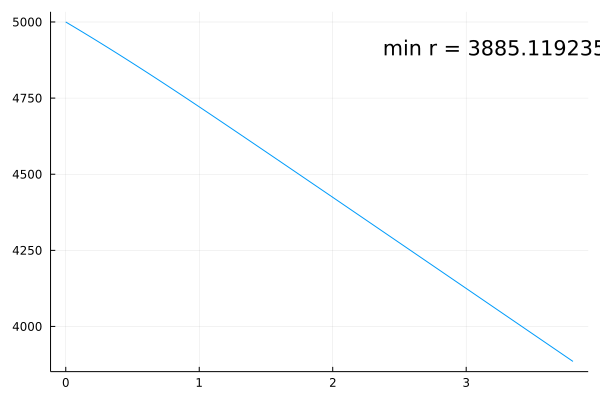

In [4]:
t = df.time
r = df.sol |> Map(datum -> datum.r) |> collect
plot(t,r, label = :false)
annotate!((0.9,0.9), "min r = "*string(minimum(r)) )